In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X: 0~2까지의 무작위 데이터
# y: y=3x+4식에 노이즈첨가
# 이 식은 모르는 상태이므로 기울기(3)와 y절편(4)을 구하는게 목적
X = 2*np.random.rand(1000, 1)
y = 3*X + 4 + np.random.randn(1000, 1)

In [3]:
# 최소제곱법(Ordinary Least Square, OLS)
X_mean = np.mean(X)
y_mean = np.mean(y)
maxCnt = np.size(X)
cnt = 0
deno = 0  # 분모
numer = 0 # 분자
# a = ((x-x평균)*(y-y평균))의 합 / ((x-x평균)의 제곱)의 합
# b = y평균 - a*x평균
while cnt<maxCnt:
    deno += (X[cnt]-X_mean)**2
    numer += (X[cnt]-X_mean)*(y[cnt]-y_mean)
    cnt += 1
a = numer/deno
b = y_mean-a*X_mean

print(a,b)

[3.05250461] [3.97961137]


In [4]:
# 초기에 임의로 예측한 시작값으로 평균제곱오차(Mean Squared Error, MSE)구하기
# a와 b에 임의로 추정값을 설정 후 y의 추정값 계산
# MSE로 목표값과 어느정도 차이가 나는지 확인
a_hat = 2
b_hat = 6
y_hat_arr = []
for i in range(maxCnt):
    y_hat_arr.append(a_hat*X[i]+b_hat)
    
mse = (y_hat_arr-y)**2 # (추정y-y)²의 평균
mse = np.mean(mse)

print(mse)

2.172319629672612


In [5]:
# 경사하강법(Gradient Descent, GD)
# MSE는 값이 작을수록 해(실제 a와 b)에 가까우므로 표현식이 양의 2차함수인 이 함수의 최소값이 바로 오차가 가장 작은 지점이다
# MSE =  {∑(y_hat-y)²}/n AND y_hat = a_hat*X + b_hat
# MSE = {∑(a_hat*X + b_hat - y)²}/n => 대입으로 y_hat을 없애는 이유: a와 b의 편미분을 하기 위해
# 이제 a와 b로 편미분을 시행 => 편미분을 하는 이유: 풀어야 할 변수가 2개, 미분을 하는 이유: 변화량을 구하기위해
# a편미분: ∑2x(ax+b-y)/n, b편미분: ∑2(ax+b-y)/n
learningRate = 1e-4 # 학습률
epochs = 100000     # 시행횟수
a_hat = 2           # a 초기값 (임의변경가능)
b_hat = 6           # b 초기값 (임의변경가능)
for i in range(epochs):
    y_hat = a_hat*X + b_hat                # 예측할 식
    error = y_hat-y                        # 이번 회차의 오차
    
    a_hat -= learningRate*np.mean(X*error) # 학습률*a편미분(변화량)(2는 학습률에 포함) 역반영
    b_hat -= learningRate*np.mean(error)   # 학습률*b편미분(변화량) 역반영
    
print(a_hat, b_hat)

2.7208919512180723 4.377537370984916


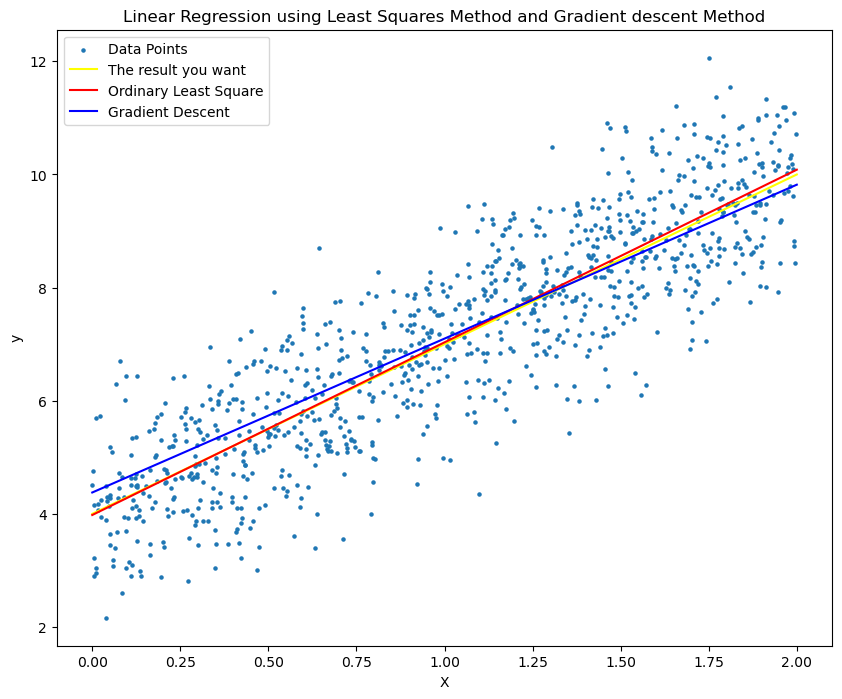

In [6]:
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_ori = 3*X_line + 4
y_ols = a*X_line + b
y_gd = a_hat*X_line + b_hat

# 산점도와 회귀 직선 그리기
plt.figure(figsize=(10, 8))
plt.scatter(X, y, s=5, label='Data Points')
plt.plot(X_line, y_ori, color='yellow', label='The result you want')
plt.plot(X_line, y_ols, color='red', label='Ordinary Least Square')
plt.plot(X_line, y_gd, color='blue', label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Least Squares Method and Gradient descent Method')
plt.legend()
plt.show()